In [1]:
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import folium
from folium.plugins import FastMarkerCluster

%config InlineBackend.figure_format = 'retina'
 
!apt -qq -y install fonts-nanum
! pip install pyproj

! pip install geopandas

import geopandas as gpd
gpd.__version__
 
import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 25 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Selecting previously unselected package fonts-nanum.
(Reading database ... 144568 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacking fonts-nanum (20170925-1) ...
Setting up fonts-nanum (20170925-1) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...
     |████████████████████████████████| 10.4MB 661kB/s 
     |████████████████████████████████| 931kB 1.3MB/s 
     |████████████████████████████████| 14.7MB 42.1MB/s 


# 횡단보도 1

In [0]:
cw = pd.read_csv('/content/drive/My Drive/Colab Notebooks/data/공모전/동작구_공모전/서울시_횡단보도.csv',encoding='cp949')

In [3]:
cw.head()
#cw.rename(columns={'X좌표':'위도','Y좌표':'경도'},inplace=True)

,순번,횡단보도관리번호,상태,횡단보도종류코드,가로길이,세로길이,화살표시수량,화살표시길이,고가,구경찰서코드,구코드,동코드,지번,신경찰서코드,작업구분,표출구분,도로구분,관할사업소,신규정규화ID,설치일,교체일,이력ID,공사관리번호,횡단보도관리번호.1,공사형태,위도,경도
0,76,06-0000030057,001,002,0.0,0.0,4,001,001,390,380,11300,산189-1,390,1,2,002,108,'','','',47540.0,2000-0000-000,06-030057,'',37.631108,126.927777
1,77,06-0000029813,001,001,0.0,0.0,0,001,001,240,410,11800,423-100029813,140,1,2,002,108,'','','',39989.0,2008-0104-956,06-029813,005,37.578073,126.927166
2,78,06-0000029814,001,001,0.0,0.0,0,001,001,240,410,11800,423-12 029814,140,1,2,002,108,'','','',39990.0,2008-0104-956,06-029814,005,37.577637,126.927554
3,79,06-0000029815,001,001,0.0,0.0,0,001,001,240,410,11800,423-170029815,140,1,2,002,108,'','','',39991.0,2008-0104-956,06-029815,005,37.577401,126.927198
4,81,06-0000029818,001,001,0.0,0.0,0,001,001,240,410,11800,423-12 029818,140,1,2,002,108,'','','',39994.0,2008-0104-956,06-029818,005,37.577929,126.928199


좌표계를 바꿔주자.

In [4]:
from pyproj import Proj,transform

#WGS1984
proj_WGS84 = Proj(init='epsg:4326')

#Web mercator projection
proj_WMP = Proj(init='epsg:3857')

/usr/local/lib/python3.6/dist-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))
/usr/local/lib/python3.6/dist-packages/pyproj/crs/crs.py:294: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  projstring = _prepare_from_string(" ".join((projstring, projkwargs)))
/usr/local/lib/python3.6/dist-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axi

In [0]:
# WGS1984 -> WMP
def transform_w84_t0_wmp(df):
  return pd.Series(transform(proj_WGS84,proj_WMP,df['위도'],df['경도']),index=['위도','경도'])

cw=cw[['구코드','동코드','위도','경도']]

In [0]:
# 동작구만 출력
cw=cw[cw['구코드']=='590'][['위도','경도']]

In [0]:
cw[['new_위도','new_경도']] = cw[['위도','경도']].apply(transform_w84_t0_wmp,axis=1)

In [8]:
# 원래의 좌표계
map= folium.Map(location=[cw['위도'].mean(),cw['경도'].mean()],tiles='Stamen Terrain',zoom_start=14)

for i in cw.index:
    folium.Map(location=[cw['위도'].mean(),cw['경도'].mean()],tiles='Stamen Terrain',zoom_start=14)
    folium.RegularPolygonMarker(
        location = [cw.loc[i,'위도'],cw.loc[i,'경도']],
        number_of_sides=5,
        color ='pink',
        radius= 6
    ).add_to(map)

map

In [9]:
# 새로만든 좌표계
map= folium.Map(location=[cw['new_위도'].mean(),cw['new_경도'].mean()],tiles='Stamen Terrain',zoom_start=14)

for i in cw.index:
    folium.Map(location=[cw['new_위도'].mean(),cw['new_경도'].mean()],tiles='Stamen Terrain',zoom_start=14)
    folium.RegularPolygonMarker(
        location = [cw.loc[i,'new_위도'],cw.loc[i,'new_경도']],
        number_of_sides=5,
        color ='pink',
        radius= 6
    ).add_to(map)

map

In [10]:
cw

,위도,경도,new_위도,new_경도
34,37.479733,126.971188,inf,inf
145,37.637004,126.916944,inf,inf
203,37.489080,126.964570,inf,inf
204,37.489151,126.964523,inf,inf
224,37.535254,126.863516,inf,inf
...,...,...,...,...
31935,37.531248,127.084279,inf,inf
32032,37.498417,127.130846,inf,inf
32087,37.551523,127.047316,inf,inf
32092,37.576195,126.897851,inf,inf


좌표계를 바꿔봤지만 무한대로 간다.. 왜그러지

# 횡단보도 2

In [0]:
cw = pd.read_csv('/content/drive/My Drive/Colab Notebooks/data/공모전/동작구_공모전/서울시_횡단보도2.csv',encoding='cp949')

In [0]:
#동작구만 출력
cw= cw[cw['구코드']=='590'][['X좌표','Y좌표']]

In [0]:
gdf = gpd.GeoDataFrame(
    cw, geometry=gpd.points_from_xy(cw.X좌표, cw.Y좌표))

findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.


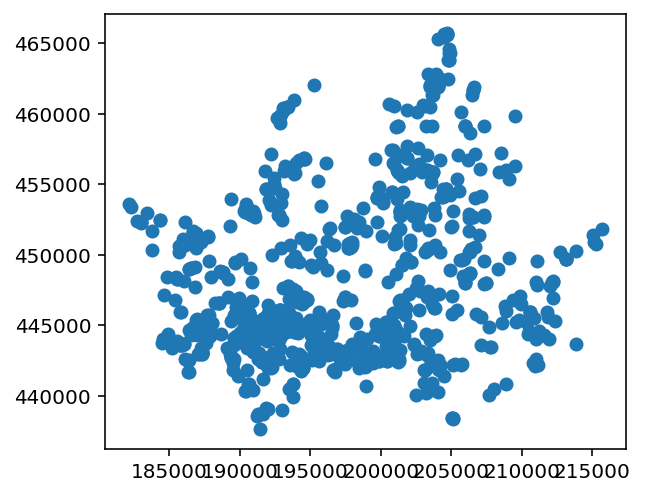

In [14]:
gdf.plot()

In [15]:
gdf

,X좌표,Y좌표,geometry
31,197451.642,442255.162,POINT (197451.642 442255.162)
159,196862.476,443300.589,POINT (196862.476 443300.589)
197,187936.967,448425.623,POINT (187936.967 448425.623)
268,191389.521,443044.246,POINT (191389.521 443044.246)
305,194742.444,450740.897,POINT (194742.444 450740.897)
...,...,...,...
31881,188506.384,446581.069,POINT (188506.384 446581.069)
31887,201515.963,446776.038,POINT (201515.963 446776.038)
31928,201047.138,450800.937,POINT (201047.138 450800.937)
31956,185521.101,448261.443,POINT (185521.101 448261.443)


이 데이터 또한 서울시 전역을 나타내는 형태를 보이고 있음. 

# SHP 파일 소환
- GeoPandas 사용

In [0]:
cw = gpd.read_file('/content/drive/My Drive/Colab Notebooks/data/공모전/동작구_공모전/WGS1984.shp')

In [0]:
#동작구만 출력
cw= cw[cw['GU_CDE']=='590']

In [18]:
cw.shape

(1021, 28)

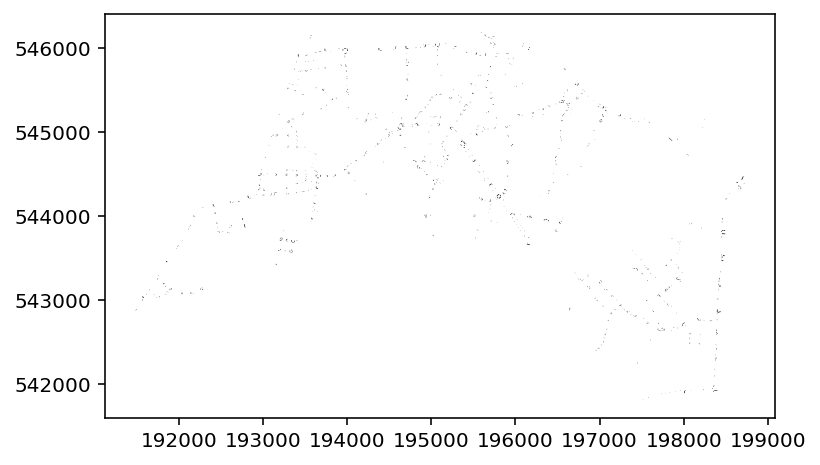

In [19]:
cw.plot(color='black')
plt.show()

In [20]:
cw.head()

,MGRNU,STAT_CDE,A004_KND_C,HOL,VEL,AW_SN_QUA,AW_SN_LENX,EVE_CDE,OD_PE_CDE,GU_CDE,DONG_CDE,JIBUN,NW_PE_CDE,WORK_CDE,VIEW_CDE,ROD_GBN_CD,TFC_BSS_CD,SIXID,ESB_YMD,CAE_YMD,HISID,CTK_MGRNU,CRS_MGRNU,FRM_CDE,CSS_CDE,RN_CDE,MNG_AGEN,geometry
67,06-0000029954,001,002,0.0,0.0,0.0,001,001,380,590,10700,708-592천,220,001,002,002,105,None,None,None,40743.0,2000-0000-000,06-029954,None,None,None,None,"POLYGON ((197454.492 542261.962, 197452.492 54..."
191,06-0000029737,001,001,0.0,0.0,0.0,001,001,380,590,10700,708-1110천,220,001,002,002,105,None,None,None,38664.0,2008-0108-015,06-029737,005,None,None,None,"POLYGON ((196865.054 543287.996, 196865.954 54..."
192,06-0000029738,001,001,0.0,0.0,0.0,001,001,380,590,10700,708-1110천,220,001,002,002,105,None,None,None,38725.0,2008-0108-015,06-029738,005,None,None,None,"POLYGON ((196865.726 543298.389, 196858.726 54..."
208,06-0000029745,004,001,0.0,0.0,0.0,001,001,220,590,10700,산32-59 도,220,001,002,002,105,3141755,None,None,41207.0,2007-0508-002,06-029745,005,None,None,None,"POLYGON ((197049.859 542551.250, 197051.938 54..."
209,06-0000029746,001,001,0.0,0.0,0.0,001,001,220,590,10200,320-20도,220,003,002,002,105,None,None,None,78146.0,2010-1008-023,06-029746,005,None,None,None,"POLYGON ((194088.073 544421.897, 194088.073 54..."


In [21]:
cw.head(3)

,MGRNU,STAT_CDE,A004_KND_C,HOL,VEL,AW_SN_QUA,AW_SN_LENX,EVE_CDE,OD_PE_CDE,GU_CDE,DONG_CDE,JIBUN,NW_PE_CDE,WORK_CDE,VIEW_CDE,ROD_GBN_CD,TFC_BSS_CD,SIXID,ESB_YMD,CAE_YMD,HISID,CTK_MGRNU,CRS_MGRNU,FRM_CDE,CSS_CDE,RN_CDE,MNG_AGEN,geometry
67,06-0000029954,001,002,0.0,0.0,0.0,001,001,380,590,10700,708-592천,220,001,002,002,105,None,None,None,40743.0,2000-0000-000,06-029954,None,None,None,None,"POLYGON ((197454.492 542261.962, 197452.492 54..."
191,06-0000029737,001,001,0.0,0.0,0.0,001,001,380,590,10700,708-1110천,220,001,002,002,105,None,None,None,38664.0,2008-0108-015,06-029737,005,None,None,None,"POLYGON ((196865.054 543287.996, 196865.954 54..."
192,06-0000029738,001,001,0.0,0.0,0.0,001,001,380,590,10700,708-1110천,220,001,002,002,105,None,None,None,38725.0,2008-0108-015,06-029738,005,None,None,None,"POLYGON ((196865.726 543298.389, 196858.726 54..."


shp파일은 동작구만을 잘 나타내는데 이것을 점으로 만들 방안을 찾아내야함.

___

수정

In [22]:
cw=cw[['GU_CDE','DONG_CDE','JIBUN','geometry']]
cw.head()

,GU_CDE,DONG_CDE,JIBUN,geometry
67,590,10700,708-592천,"POLYGON ((197454.492 542261.962, 197452.492 54..."
191,590,10700,708-1110천,"POLYGON ((196865.054 543287.996, 196865.954 54..."
192,590,10700,708-1110천,"POLYGON ((196865.726 543298.389, 196858.726 54..."
208,590,10700,산32-59 도,"POLYGON ((197049.859 542551.250, 197051.938 54..."
209,590,10200,320-20도,"POLYGON ((194088.073 544421.897, 194088.073 54..."


In [23]:
# copy poly to new GeoDataFrame
points = cw.copy()
# change the geometry
points.geometry = points['geometry'].centroid
# same crs
points.crs =cw.crs
points.head()

,GU_CDE,DONG_CDE,JIBUN,geometry
67,590,10700,708-592천,POINT (197451.683 542255.491)
191,590,10700,708-1110천,POINT (196866.586 543293.197)
192,590,10700,708-1110천,POINT (196862.427 543300.621)
208,590,10700,산32-59 도,POINT (197052.454 542556.129)
209,590,10200,320-20도,POINT (194092.427 544422.820)


In [24]:
points.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

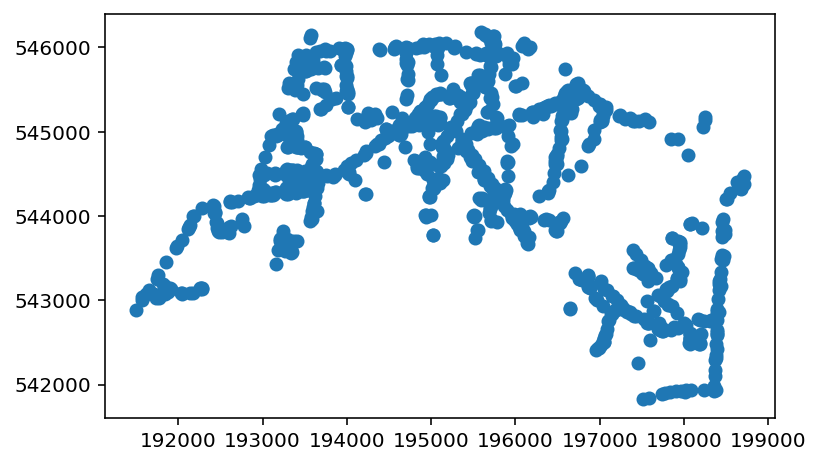

In [25]:
points.plot()

In [0]:
points.to_csv('/content/drive/My Drive/Colab Notebooks/data/공모전/동작구_공모전/cw_point.csv')

In [27]:
cw = pd.read_csv('/content/drive/My Drive/Colab Notebooks/data/공모전/동작구_공모전/cw_point.csv')
cw.head()

,Unnamed: 0,GU_CDE,DONG_CDE,JIBUN,geometry
0,67,590,10700,708-592천,POINT (197451.6832775803 542255.4905198738)
1,191,590,10700,708-1110천,POINT (196866.5862597014 543293.1973734621)
2,192,590,10700,708-1110천,POINT (196862.4271102072 543300.6210580587)
3,208,590,10700,산32-59 도,POINT (197052.4542100756 542556.1290698861)
4,209,590,10200,320-20도,POINT (194092.4268168866 544422.8202240409)


In [0]:
cw['X좌표'] = cw['geometry'].apply(lambda x: x.split('(')[1].rstrip(')').split(' ')[0])
cw['Y좌표'] = cw['geometry'].apply(lambda x: x.split('(')[1].rstrip(')').split(' ')[1])
cw['X좌표'] = cw['X좌표'].apply(pd.to_numeric)
cw['Y좌표'] = cw['Y좌표'].apply(pd.to_numeric)

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51340 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54364 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 51340 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 54364 missing from current font.
  font.set_text(s, 0, flags=flags)


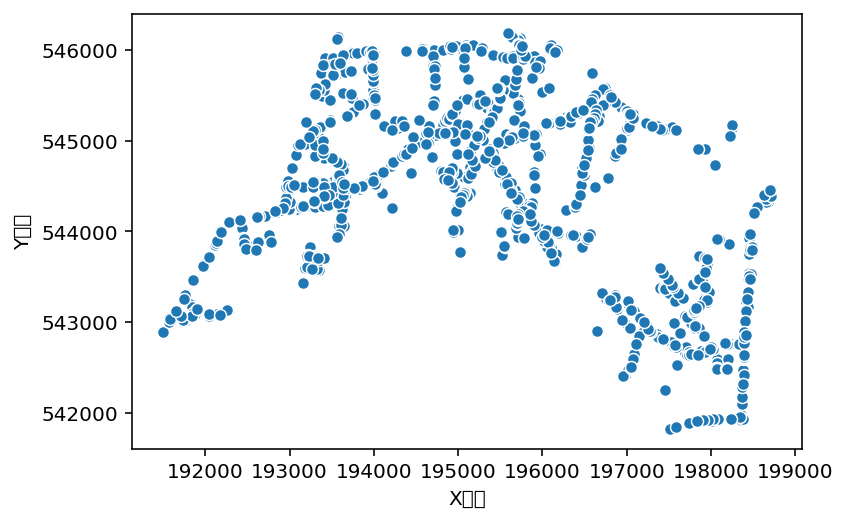

In [29]:
sns.scatterplot('X좌표','Y좌표',data=cw)

In [30]:
cw

,Unnamed: 0,GU_CDE,DONG_CDE,JIBUN,geometry,X좌표,Y좌표
0,67,590,10700,708-592천,POINT (197451.6832775803 542255.4905198738),197451.683278,542255.490520
1,191,590,10700,708-1110천,POINT (196866.5862597014 543293.1973734621),196866.586260,543293.197373
2,192,590,10700,708-1110천,POINT (196862.4271102072 543300.6210580587),196862.427110,543300.621058
3,208,590,10700,산32-59 도,POINT (197052.4542100756 542556.1290698861),197052.454210,542556.129070
4,209,590,10200,320-20도,POINT (194092.4268168866 544422.8202240409),194092.426817,544422.820224
...,...,...,...,...,...,...,...
1016,33608,590,10200,325대,POINT (195228.9010416667 545047.3096751412),195228.901042,545047.309675
1017,33670,590,10100,873도,POINT (198696.0396763561 544450.0294253594),198696.039676,544450.029425
1018,33671,590,10200,230-44도,POINT (194622.9813685254 544961.5032177385),194622.981369,544961.503218
1019,33672,590,10200,521 대,POINT (195018.1511116895 544319.5311748846),195018.151112,544319.531175


In [0]:
#cw.drop('Unnamed: 0',axis=1,inplace=True)
cw.to_csv('/content/drive/My Drive/Colab Notebooks/data/공모전/동작구_공모전/cw_point.csv',index=False,encoding='cp949')

이제 중요한건 다른 위도,경도 좌표를 cw 와 같은 X좌표, Y좌표로 바꿀 것인지 아니면 cw와 유동인구 데이터를 일반적인 위도, 경도 데이터로 바꿀 수 있는지를 알아봐야 할 것 같다.